In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## FA 오재일 영입의 우려
### 타격지표의 하락

In [6]:
ojl_season = pd.read_csv("ojl_season.csv")
ojl_season

,연도,팀,P,G,타석,타수,득점,안타,2타,3타,홈런,출루,장타,OPS,WAR*
0,2016,두산,1B,105,455,380,69,120,20,2,27,0.411,0.592,1.003,4.03
1,2017,두산,1B,128,466,412,62,126,27,0,26,0.379,0.561,0.939,3.87
2,2018,두산,1B,123,477,401,69,112,19,2,27,0.373,0.539,0.912,2.85
3,2019,두산,1B,130,529,467,76,137,29,1,21,0.369,0.495,0.863,4.17
4,2020,두산,1B,127,534,471,62,147,32,0,16,0.390,0.482,0.872,3.59


([<matplotlib.axis.XTick at 0x1c1163e1a48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

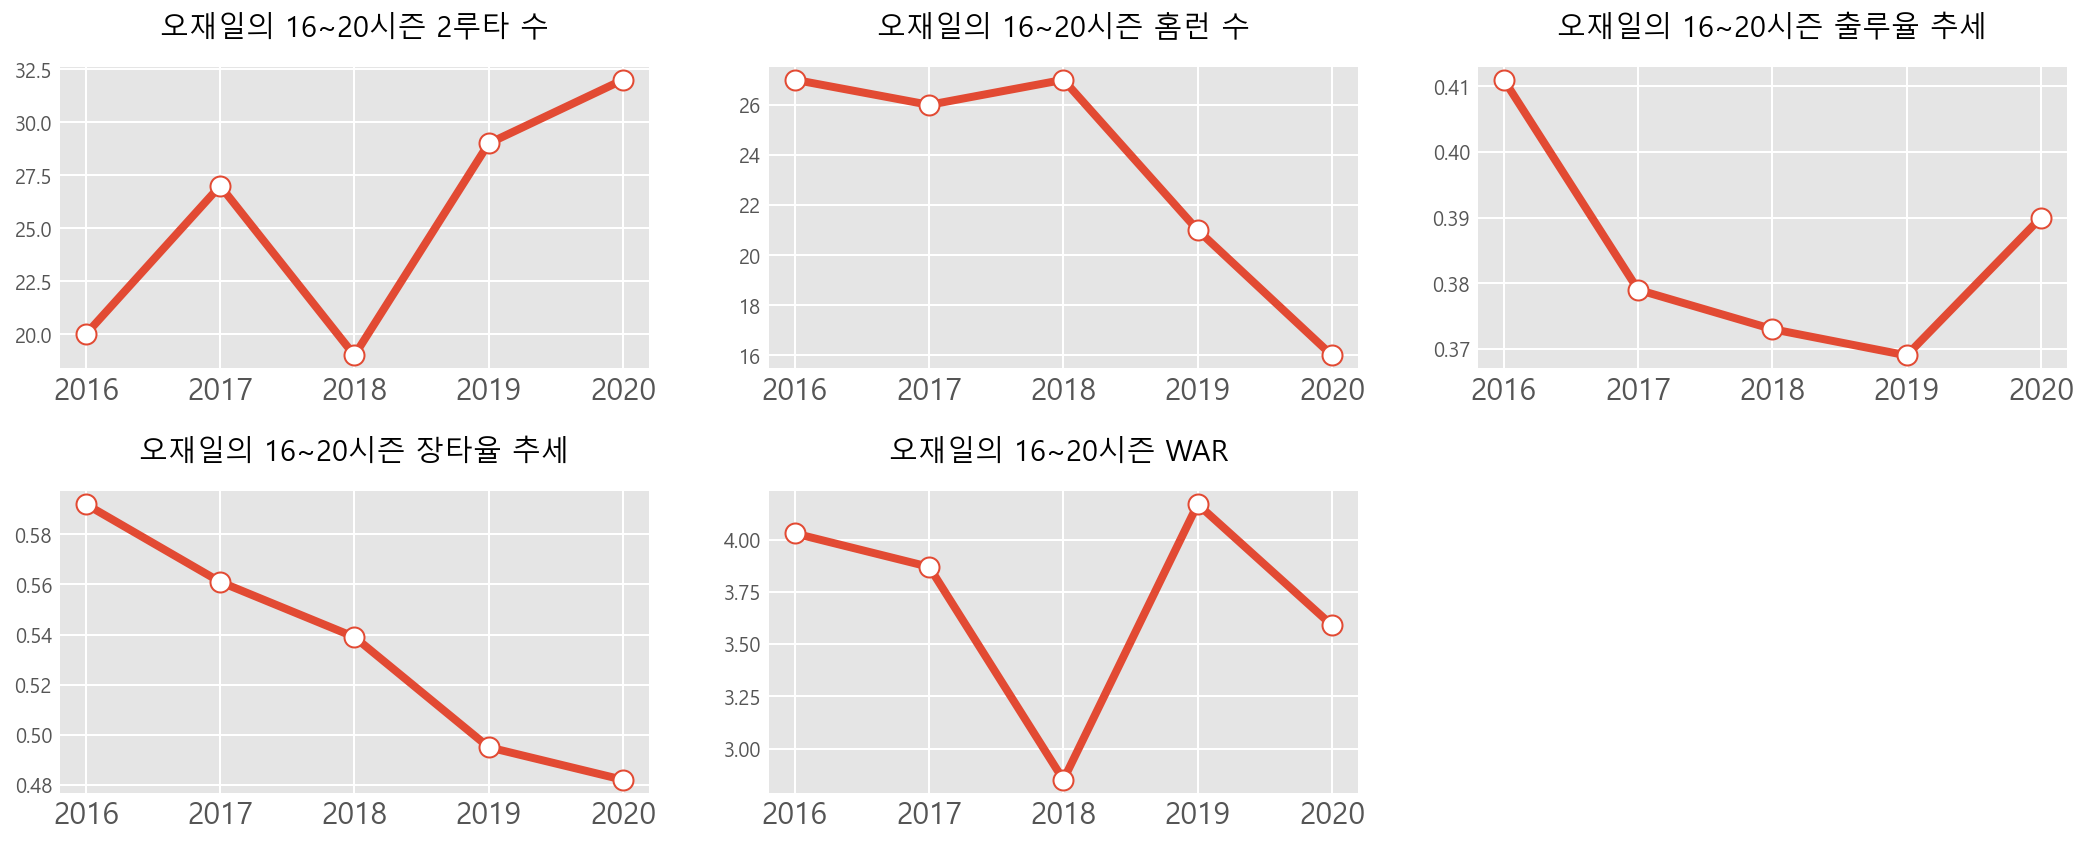

In [7]:
plt.style.use('ggplot')

plt.figure(figsize=(18,10))

plt.subplot(331)
plt.title("오재일의 16~20시즌 2루타 수",pad=15)
plt.plot(ojl_season["연도"],ojl_season["2타"],marker='o',markerfacecolor='w',markersize=10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplot(332)
plt.title("오재일의 16~20시즌 홈런 수",pad=15)
plt.plot(ojl_season["연도"],ojl_season["홈런"],marker='o',markerfacecolor='w',markersize=10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplot(333)
plt.title("오재일의 16~20시즌 출루율 추세",pad=15)
plt.plot(ojl_season["연도"],ojl_season["출루"],marker='o',markerfacecolor='w',markersize=10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.subplot(334)
plt.title("오재일의 16~20시즌 장타율 추세",pad=15)
plt.plot(ojl_season["연도"],ojl_season["장타"],marker='o',markerfacecolor='w',markersize=10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplot(335)
plt.title("오재일의 16~20시즌 WAR ",pad=15)
plt.plot(ojl_season["연도"],ojl_season["WAR*"],marker='o',markerfacecolor='w',markersize=10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

### 20시즌 타구비율

In [8]:
ojl_tagu_df = pd.read_csv("ojl_tagu.csv")
ojl_tagu_df

,연도,팀,나이,P,타석,뜬공,땅볼,FO/GO,InP%,InP(내야),InP(외야),BABIP,타율(내야),타율(외야),내야뜬공(N),내야뜬공(%),내야안타(N),내야안타(%)
0,2016,두산,30,1B,455,117,70,1.67,69.0,40.7,59.3,0.324,0.072,0.610,46,39.3,9,7.5
1,2017,두산,31,1B,466,134,72,1.86,71.9,35.5,64.5,0.324,0.068,0.551,38,28.4,8,6.4
2,2018,두산,32,1B,477,111,57,1.95,60.8,32.9,67.1,0.323,0.054,0.569,30,27.0,5,4.5
3,2019,두산,33,1B,529,155,76,2.04,70.3,33.7,66.3,0.331,0.073,0.525,39,25.2,9,6.6
4,2020,두산,34,1B,534,126,106,1.19,71.4,40.4,59.6,0.359,0.098,0.584,32,25.4,15,10.2


In [9]:
a = ojl_tagu_df['FO/GO'][:4].mean()
a = round(a,3)
a

1.88

In [10]:
b = ojl_tagu_df["FO/GO"].mean()
b = round(b,3)
b

1.742

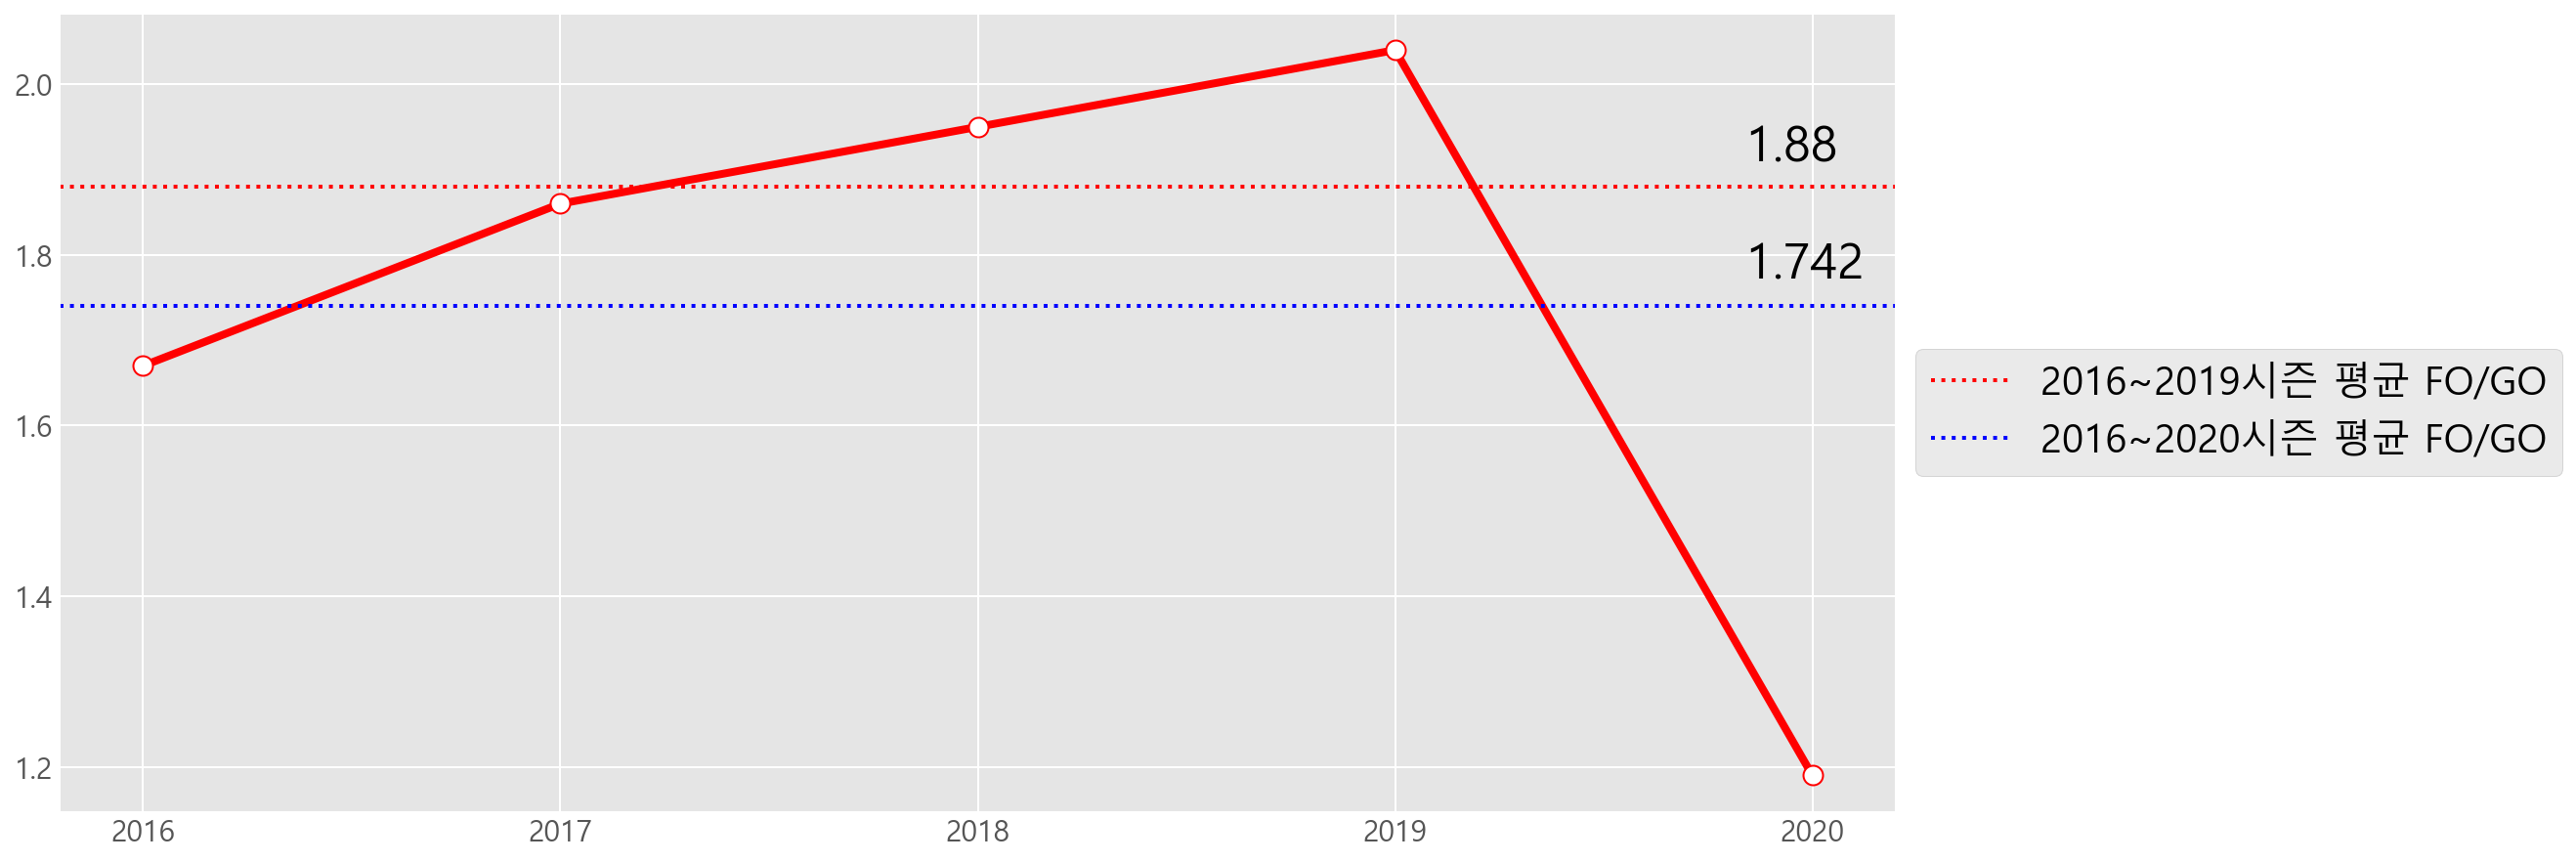

In [11]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

plt.plot(ojl_tagu_df["연도"],ojl_tagu_df["FO/GO"],color = 'red',marker='o',markerfacecolor = 'w', markersize = 10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y=1.88, color='r',linestyle=':', linewidth=2,label=("2016~2019시즌 평균 FO/GO"))
plt.text(2019.8, a+0.03,f' {a}' ,fontsize = 25)
plt.axhline(y=1.74, color='b',linestyle=':', linewidth=2,label=("2016~2020시즌 평균 FO/GO"))
plt.text(2019.8, b+0.03,f' {b}' ,fontsize = 25)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5),fontsize = 20)


In [12]:
ojl_ground_df = pd.read_csv("ojl_ground.csv")
ojl_ground_df = ojl_ground_df.rename({"%":"병살타 비율(%)"},axis = 'columns')
ojl_ground_df

,연도,팀,나이,P,타석,병살타,상황,병살타 비율(%)
0,2016,두산,30,1B,455,5,94,5.3
1,2017,두산,31,1B,466,5,103,4.9
2,2018,두산,32,1B,477,3,112,2.7
3,2019,두산,33,1B,529,5,112,4.5
4,2020,두산,34,1B,534,12,131,9.2


In [13]:
c = ojl_ground_df["병살타 비율(%)"][:4].mean()
c = round(c,2)
c

4.35

In [14]:
d = ojl_ground_df["병살타 비율(%)"].mean()
d = round(d,2)
d

5.32

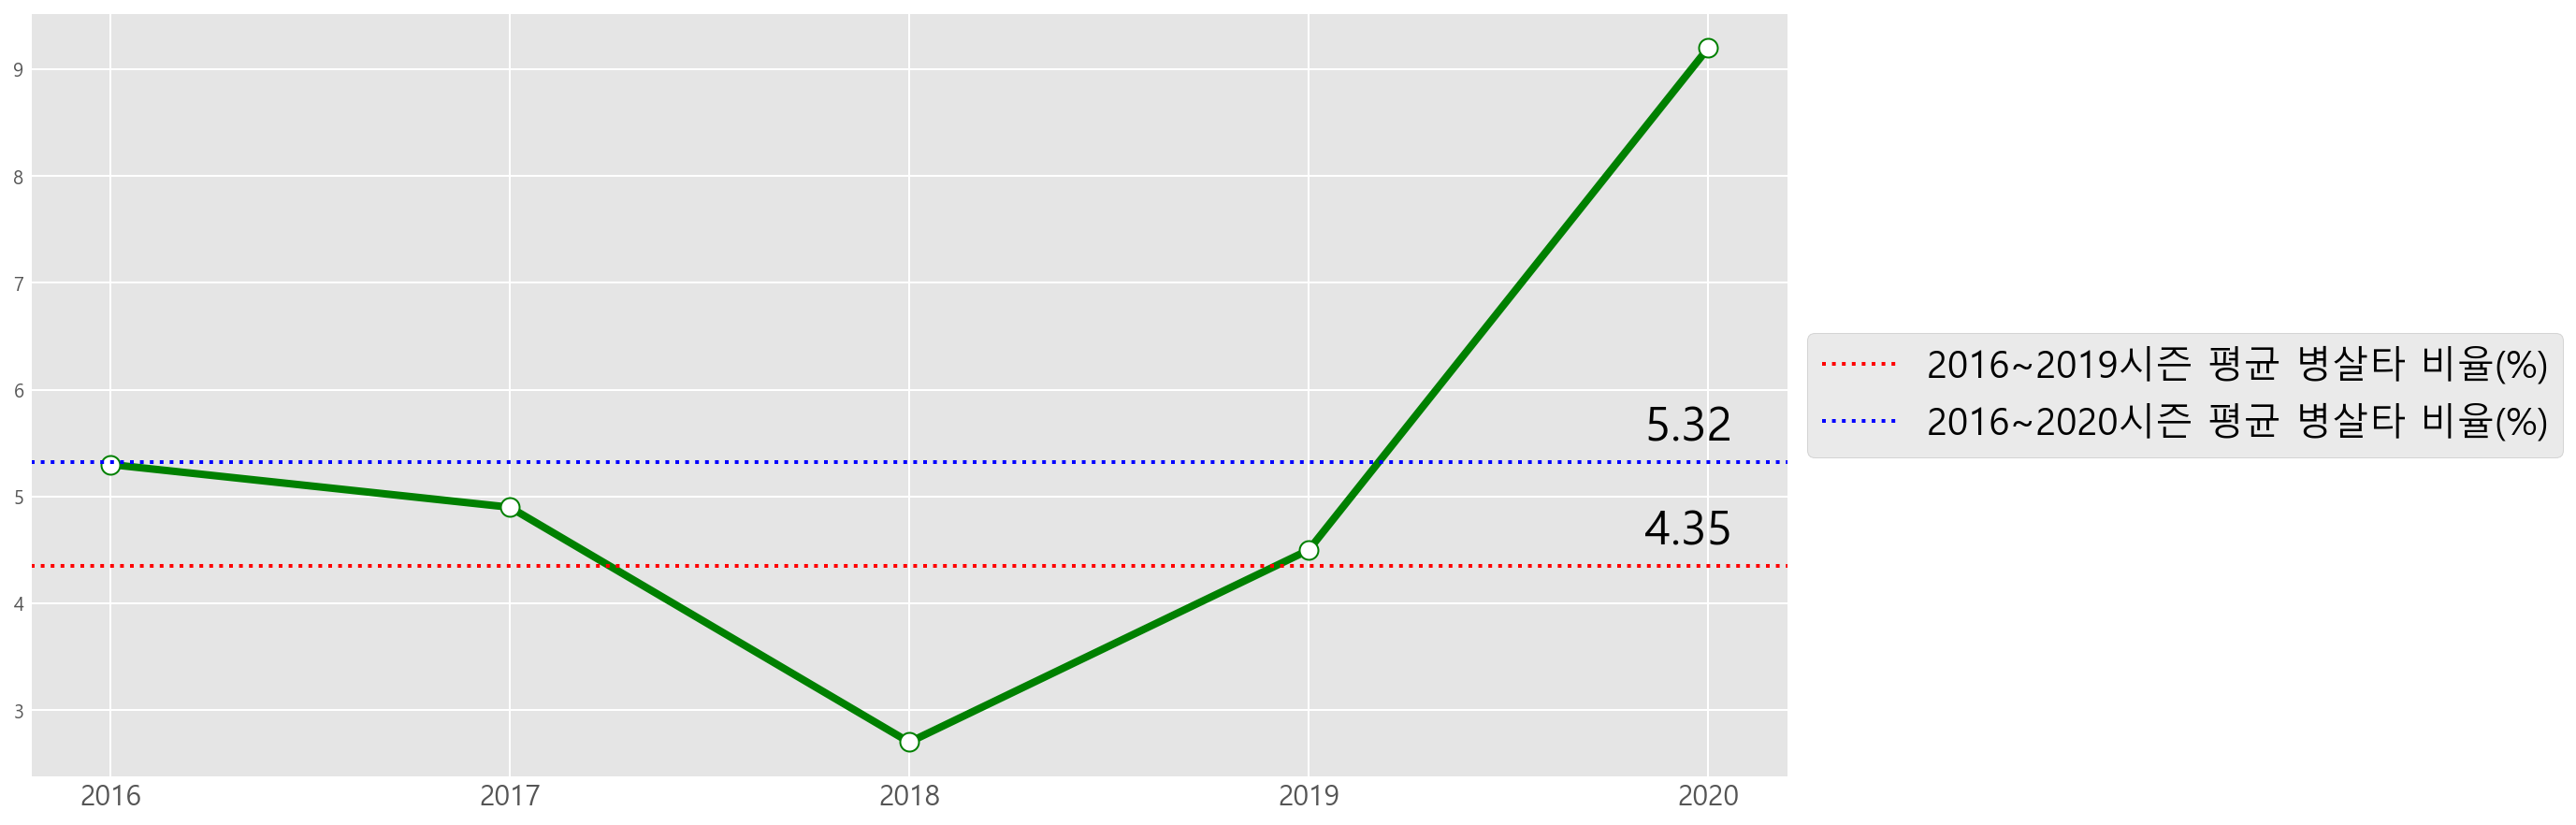

In [15]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

plt.plot(ojl_ground_df["연도"],ojl_ground_df["병살타 비율(%)"],color = 'green',marker='o',markerfacecolor = 'w', markersize = 10)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)
plt.axhline(y=c, color='r',linestyle=':', linewidth=2,label=("2016~2019시즌 평균 병살타 비율(%)"))
plt.text(2019.8, c+0.2,f' {c}' ,fontsize = 25)
plt.axhline(y=d, color='b',linestyle=':', linewidth=2,label=("2016~2020시즌 평균 병살타 비율(%)"))
plt.text(2019.8, d+0.2,f' {d}' ,fontsize = 25)

plt.legend(loc='center left', bbox_to_anchor = (1, 0.5),fontsize = 20)

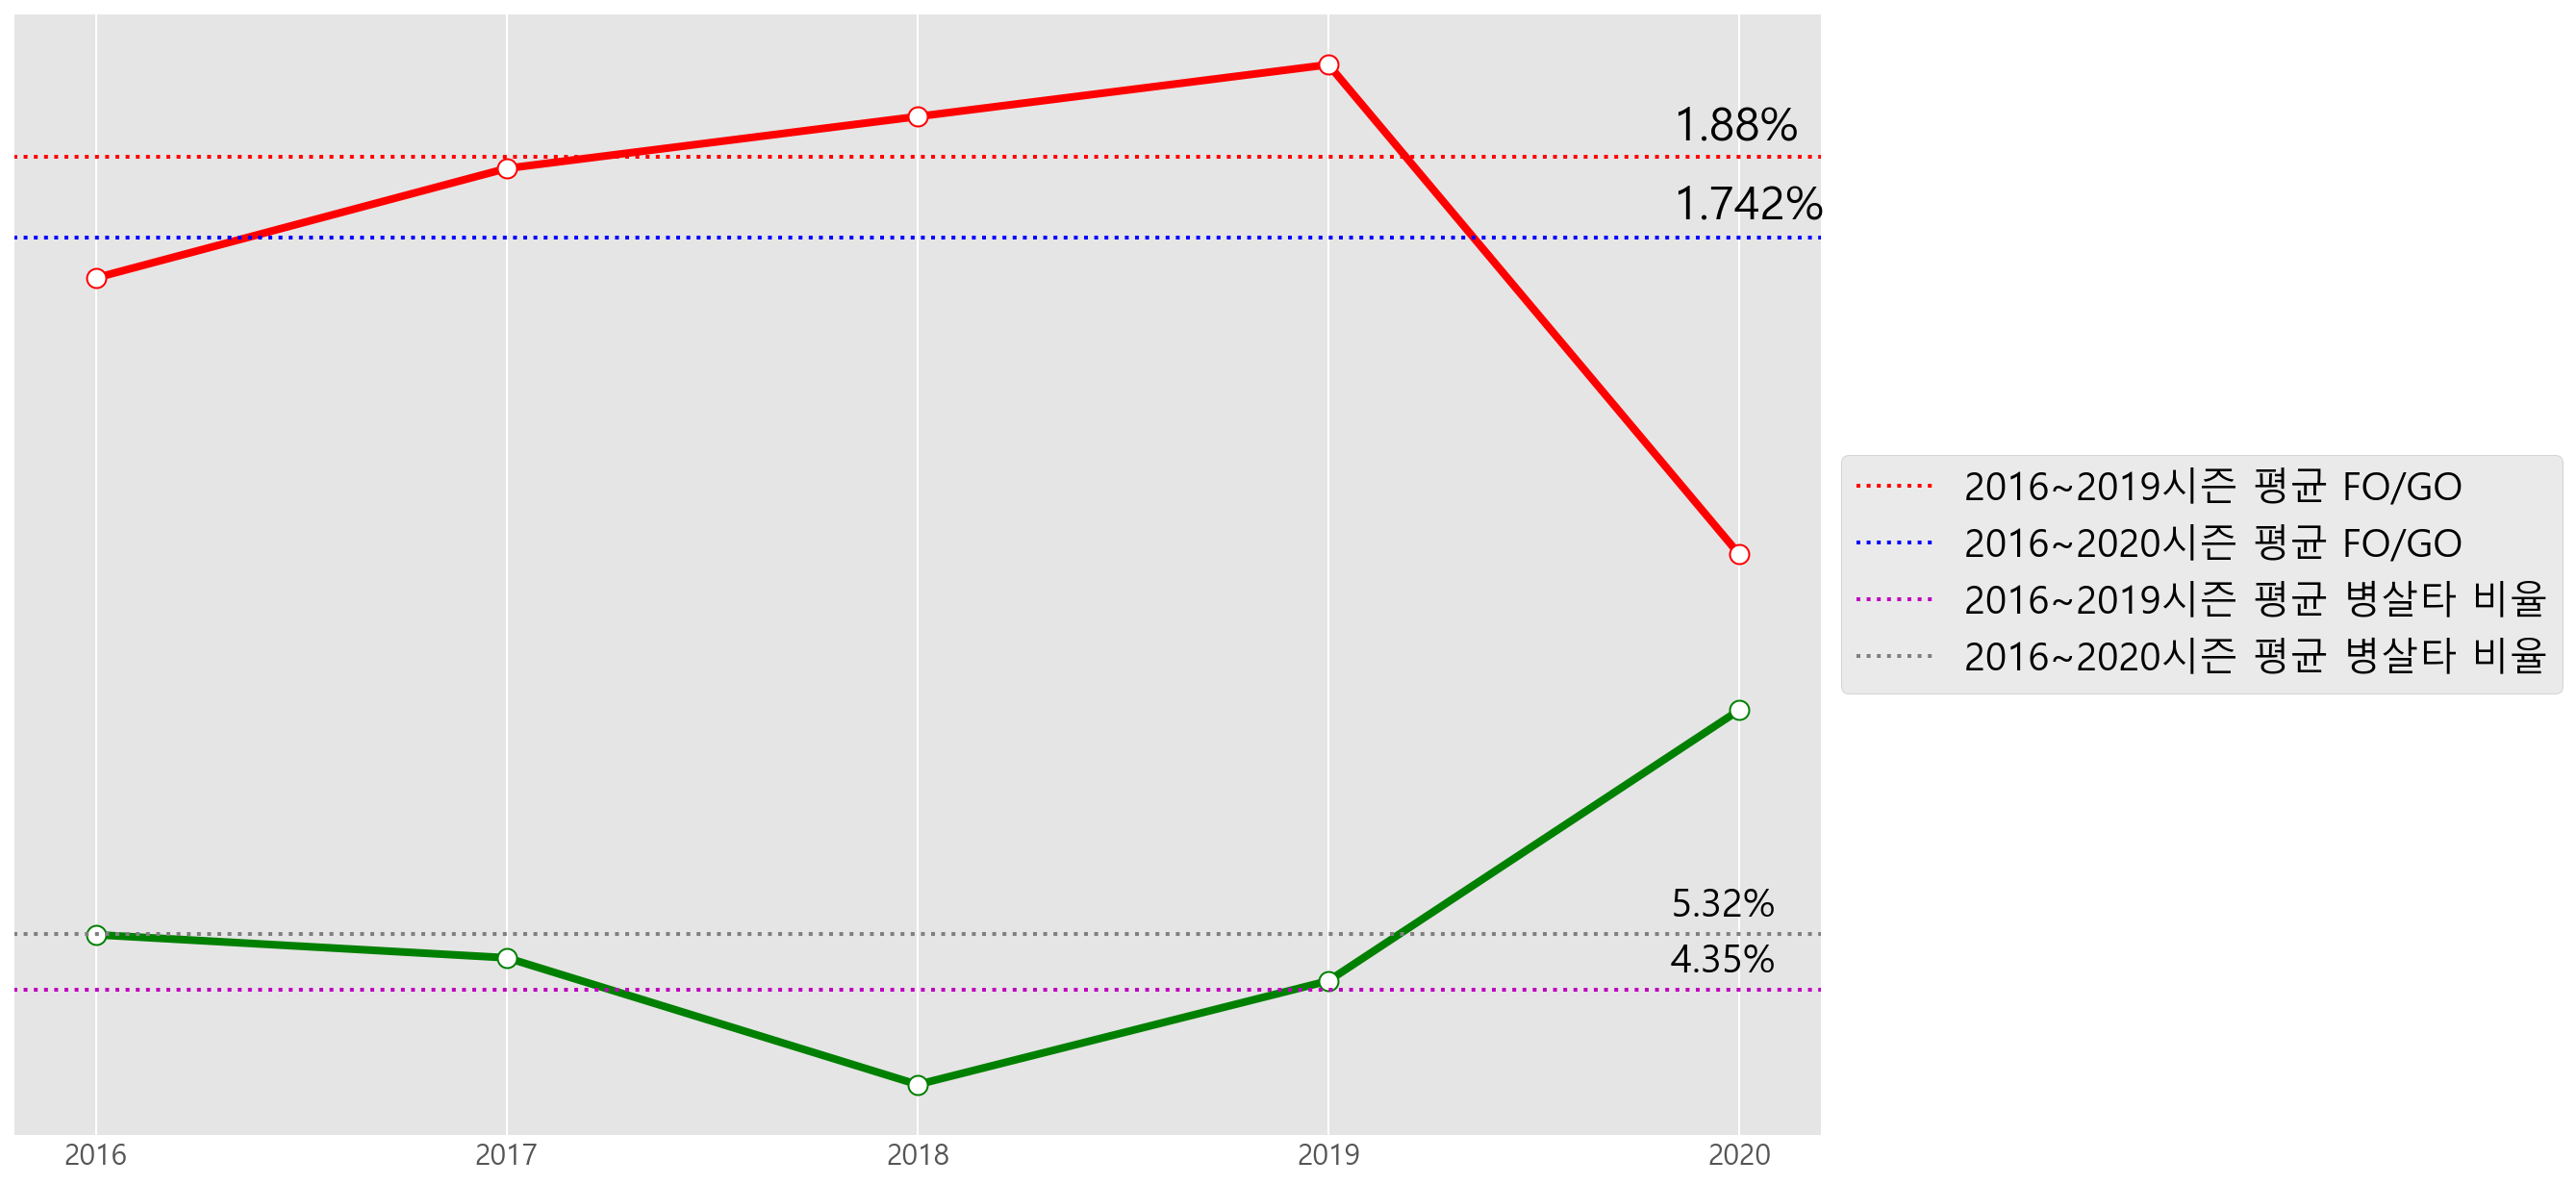

In [16]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

plt.ylabel("Y Label")
plt.plot(ojl_tagu_df["연도"],ojl_tagu_df["FO/GO"],color = 'red',marker='o',markerfacecolor = 'w', markersize = 10)
plt.plot(ojl_ground_df["연도"],ojl_ground_df["병살타 비율(%)"]/10,color = 'green',marker='o',markerfacecolor = 'w', markersize = 10)
ax.axes.yaxis.set_visible(False)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y=1.88, color='r',linestyle=':', linewidth=2,label=("2016~2019시즌 평균 FO/GO"))
plt.text(2019.8, a+0.03,f' {a}%' ,fontsize = 24)
plt.axhline(y=1.74, color='b',linestyle=':', linewidth=2,label=("2016~2020시즌 평균 FO/GO"))
plt.text(2019.8, b+0.03,f' {b}%' ,fontsize = 24)
plt.axhline(y=c/10, color='m',linestyle=':', linewidth=2,label=("2016~2019시즌 평균 병살타 비율"))
plt.text(2019.8, (c/10)+0.03,f' {c}%' ,fontsize = 20)
plt.axhline(y=d/10, color='gray',linestyle=':', linewidth=2,label=("2016~2020시즌 평균 병살타 비율"))
plt.text(2019.8, (d/10)+0.03,f' {d}%' ,fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5),fontsize = 20)

In [17]:
ojl_tagu_df

,연도,팀,나이,P,타석,뜬공,땅볼,FO/GO,InP%,InP(내야),InP(외야),BABIP,타율(내야),타율(외야),내야뜬공(N),내야뜬공(%),내야안타(N),내야안타(%)
0,2016,두산,30,1B,455,117,70,1.67,69.0,40.7,59.3,0.324,0.072,0.610,46,39.3,9,7.5
1,2017,두산,31,1B,466,134,72,1.86,71.9,35.5,64.5,0.324,0.068,0.551,38,28.4,8,6.4
2,2018,두산,32,1B,477,111,57,1.95,60.8,32.9,67.1,0.323,0.054,0.569,30,27.0,5,4.5
3,2019,두산,33,1B,529,155,76,2.04,70.3,33.7,66.3,0.331,0.073,0.525,39,25.2,9,6.6
4,2020,두산,34,1B,534,126,106,1.19,71.4,40.4,59.6,0.359,0.098,0.584,32,25.4,15,10.2


In [18]:
a1 = ojl_tagu_df["InP(내야)"][:4].mean()
b1 = ojl_tagu_df["InP(내야)"].mean()
c1 = ojl_tagu_df["InP(외야)"][:4].mean()
d1 = ojl_tagu_df["InP(외야)"].mean()


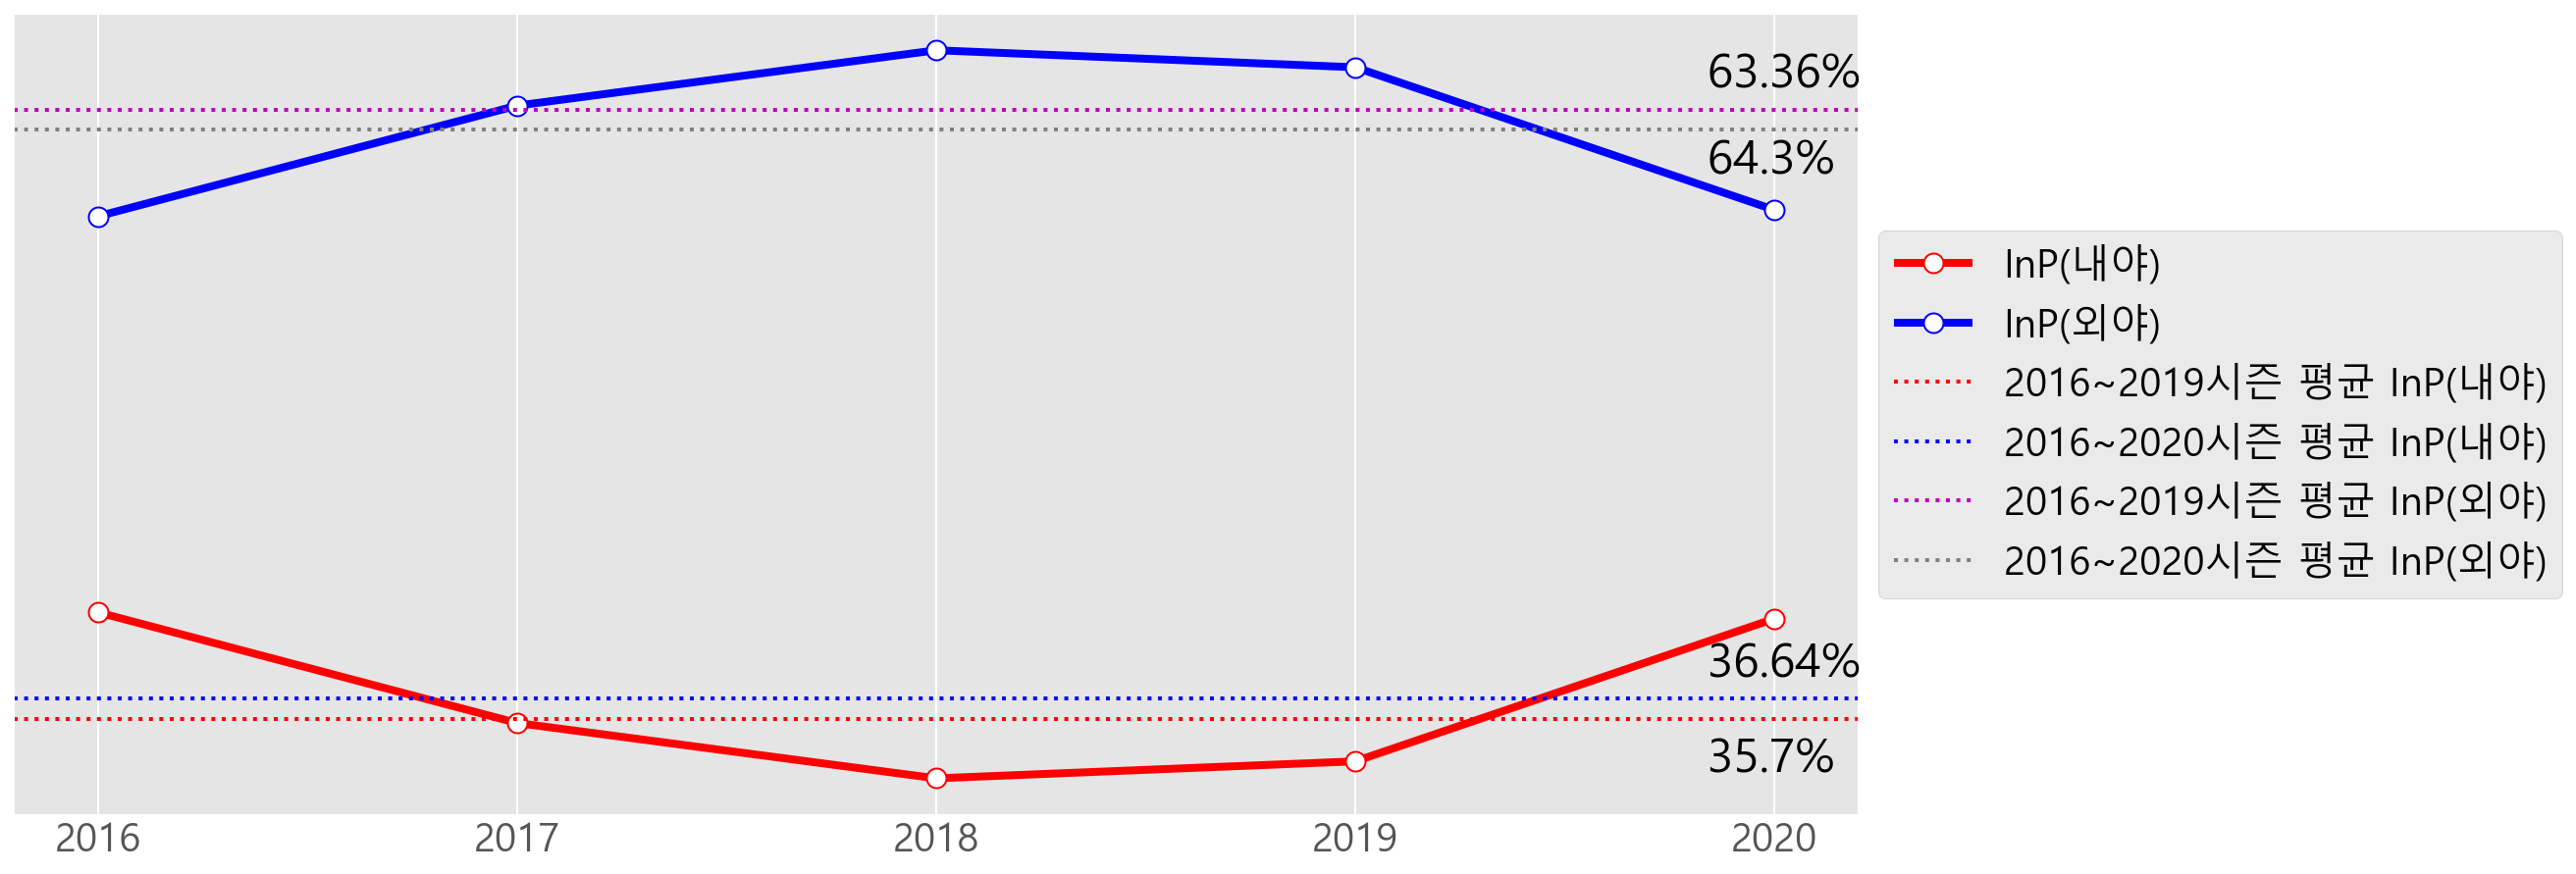

In [19]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

plt.plot(ojl_tagu_df["연도"],ojl_tagu_df["InP(내야)"],color = 'red',marker = 'o',markerfacecolor='w',markersize=10,label=("InP(내야)"))
plt.plot(ojl_tagu_df["연도"],ojl_tagu_df["InP(외야)"],color = 'blue',marker = 'o',markerfacecolor='w',markersize=10,label=("InP(외야)"))
ax.axes.yaxis.set_visible(False)

plt.xticks(np.arange(2016,2021,step = 1),fontsize=20)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5),fontsize=20)


plt.axhline(y=35.7, color='r',linestyle=':', linewidth=2,label=("2016~2019시즌 평균 InP(내야)"))
plt.text(2019.8, a1-2.5,f' {a1}%' ,fontsize = 24)
plt.axhline(y=36.64, color='b',linestyle=':', linewidth=2,label=("2016~2020시즌 평균 InP(내야)"))
plt.text(2019.8, b1+1,f' {b1}%' ,fontsize = 24)
plt.axhline(y=64.3, color='m',linestyle=':', linewidth=2,label=("2016~2019시즌 평균 InP(외야)"))
plt.text(2019.8, c1-3,f' {c1}%' ,fontsize = 24)
plt.axhline(y=63.36, color='gray',linestyle=':', linewidth=2,label=("2016~2020시즌 평균 InP(외야)"))
plt.text(2019.8, d1+2,f' {d1}%' ,fontsize = 24)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5),fontsize = 20)

### 20시즌 장타생산

In [20]:
ojl_hit_df = pd.read_csv("ojl_hit.csv")
ojl_hit_df

,연도,팀,타석,홈런,좌,LC,중,RC,우,장타,XH/AB,XH/H,HR/XH,PA/HR,AB/HR
0,2016,두산,455,27,4,0,3,0,20,49,12.9,40.8,55.1,16.9,14.07
1,2017,두산,466,26,1,0,1,0,24,53,12.9,42.1,49.1,17.9,15.85
2,2018,두산,477,27,7,0,3,0,17,48,12.0,42.9,56.3,17.7,14.85
3,2019,두산,529,21,1,0,5,0,15,51,10.9,37.2,41.2,25.2,22.24
4,2020,두산,534,16,6,0,4,0,6,48,10.2,32.7,33.3,33.4,29.44


([<matplotlib.axis.XTick at 0x1c11757b648>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

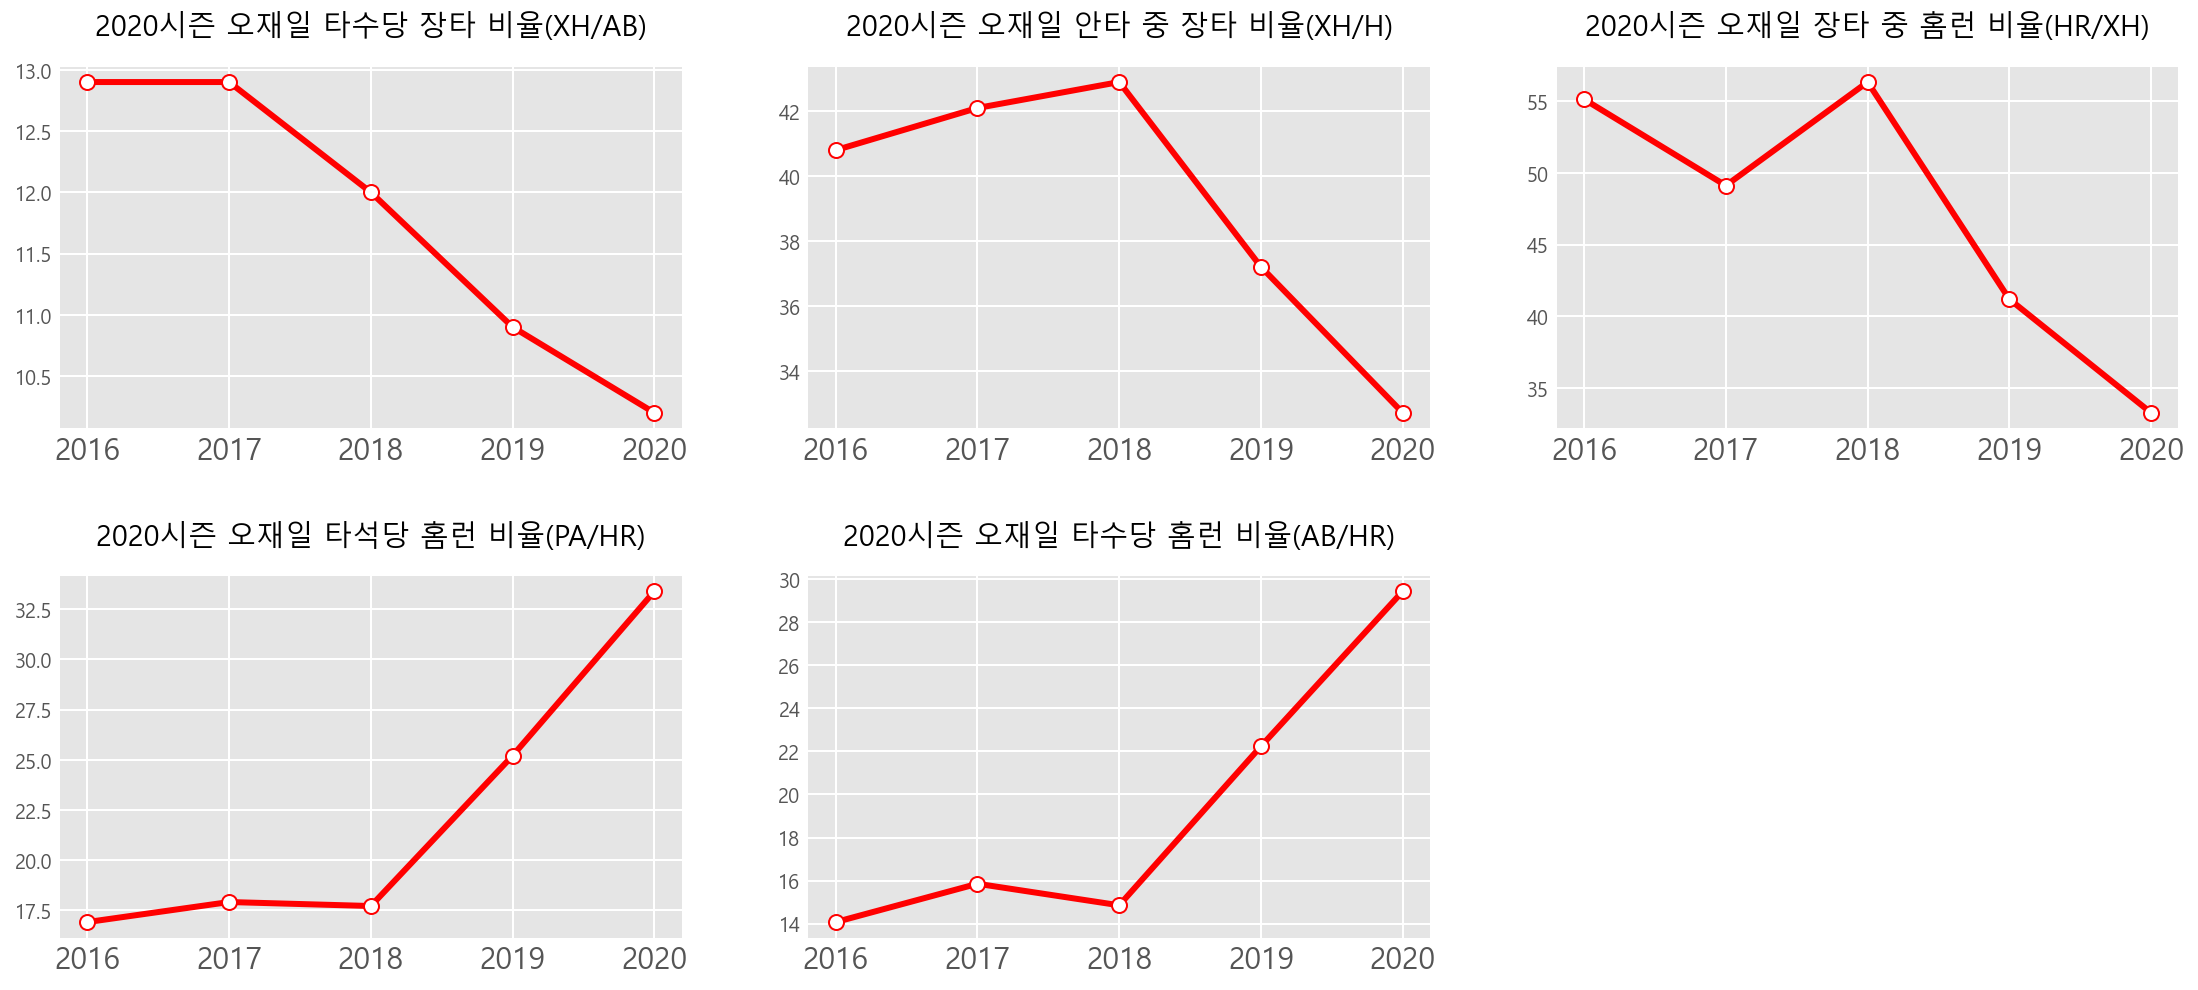

In [21]:
plt.style.use('ggplot')

plt.figure(figsize=(19,12))
plt.subplot(331)
plt.title("2020시즌 오재일 타수당 장타 비율(XH/AB)",pad=15)
plt.plot(ojl_hit_df["연도"],ojl_hit_df["XH/AB"],color='r',marker='o',linewidth=3,markerfacecolor = 'w',markersize=7.5)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplot(332)
plt.title("2020시즌 오재일 안타 중 장타 비율(XH/H)",pad=15)
plt.plot(ojl_hit_df["연도"],ojl_hit_df["XH/H"],color='r',marker='o',linewidth=3,markerfacecolor = 'w',markersize=7.5)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplot(333)
plt.title("2020시즌 오재일 장타 중 홈런 비율(HR/XH)",pad=15)
plt.plot(ojl_hit_df["연도"],ojl_hit_df["HR/XH"],color='r',marker='o',linewidth=3,markerfacecolor = 'w',markersize=7.5)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.subplot(334)
plt.title("2020시즌 오재일 타석당 홈런 비율(PA/HR)",pad=15)
plt.plot(ojl_hit_df["연도"],ojl_hit_df["PA/HR"],color='r',marker='o',linewidth=3,markerfacecolor = 'w',markersize=7.5)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

plt.subplot(335)
plt.title("2020시즌 오재일 타수당 홈런 비율(AB/HR)",pad=15)
plt.plot(ojl_hit_df["연도"],ojl_hit_df["AB/HR"],color='r',marker='o',linewidth=3,markerfacecolor = 'w',markersize=7.5)
plt.xticks(np.arange(2016,2021,step = 1),fontsize=15)

### 대처능력

In [22]:
oji_speed_df = pd.read_csv("oji_speed_df.csv")
oji_speed_df

,날짜,상대,직구,슬라이더,커브,첸졉,스플,싱커,너클
0,2016,종합,0.590,0.686,0.900,0.455,0.414,0.300,NaN
1,2017,종합,0.567,0.462,0.226,0.566,0.776,0.680,NaN
2,2018,종합,0.611,0.500,0.600,0.286,0.429,0.786,0.0
3,2019,종합,0.571,0.383,0.250,0.610,0.296,0.667,NaN
4,2020,종합,0.448,0.327,0.548,0.585,0.719,0.608,0.0


In [23]:
oji_speed_df = oji_speed_df.fillna("0")
oji_speed_df["날짜"] = oji_speed_df["날짜"].astype(str)
oji_speed_df

,날짜,상대,직구,슬라이더,커브,첸졉,스플,싱커,너클
0,2016,종합,0.590,0.686,0.900,0.455,0.414,0.300,0
1,2017,종합,0.567,0.462,0.226,0.566,0.776,0.680,0
2,2018,종합,0.611,0.500,0.600,0.286,0.429,0.786,0
3,2019,종합,0.571,0.383,0.250,0.610,0.296,0.667,0
4,2020,종합,0.448,0.327,0.548,0.585,0.719,0.608,0


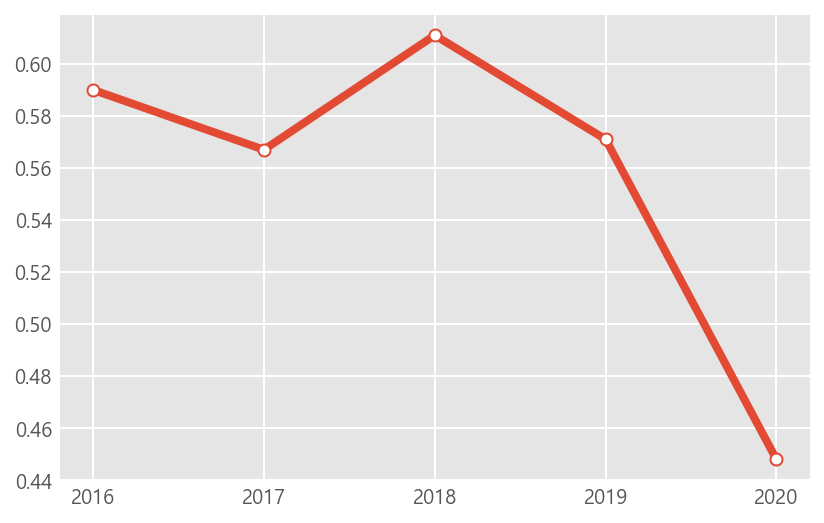

In [24]:
plt.plot(oji_speed_df["날짜"],oji_speed_df["직구"],marker="o",markerfacecolor="w")

In [25]:
tagu_dir_df = pd.read_csv("tagu_dir.csv")
tagu_dir_df["연도"] = tagu_dir_df["연도"].astype(str)
tagu_dir_df

,연도,팀,나이,P,타석,(타구 방향 개수) 좌,중,우,당,밀,(안타 방향 개수) 좌1,중1,우1,당1,밀1
0,2016,두산,30,1B,455,92,69,146,146,92,20,33,67,67,20
1,2017,두산,31,1B,466,98,81,153,153,98,17,33,76,76,17
2,2018,두산,32,1B,477,90,65,125,125,90,29,27,56,56,29
3,2019,두산,33,1B,529,109,100,159,159,109,35,39,63,63,35
4,2020,두산,34,1B,534,139,92,148,150,137,47,45,55,57,45


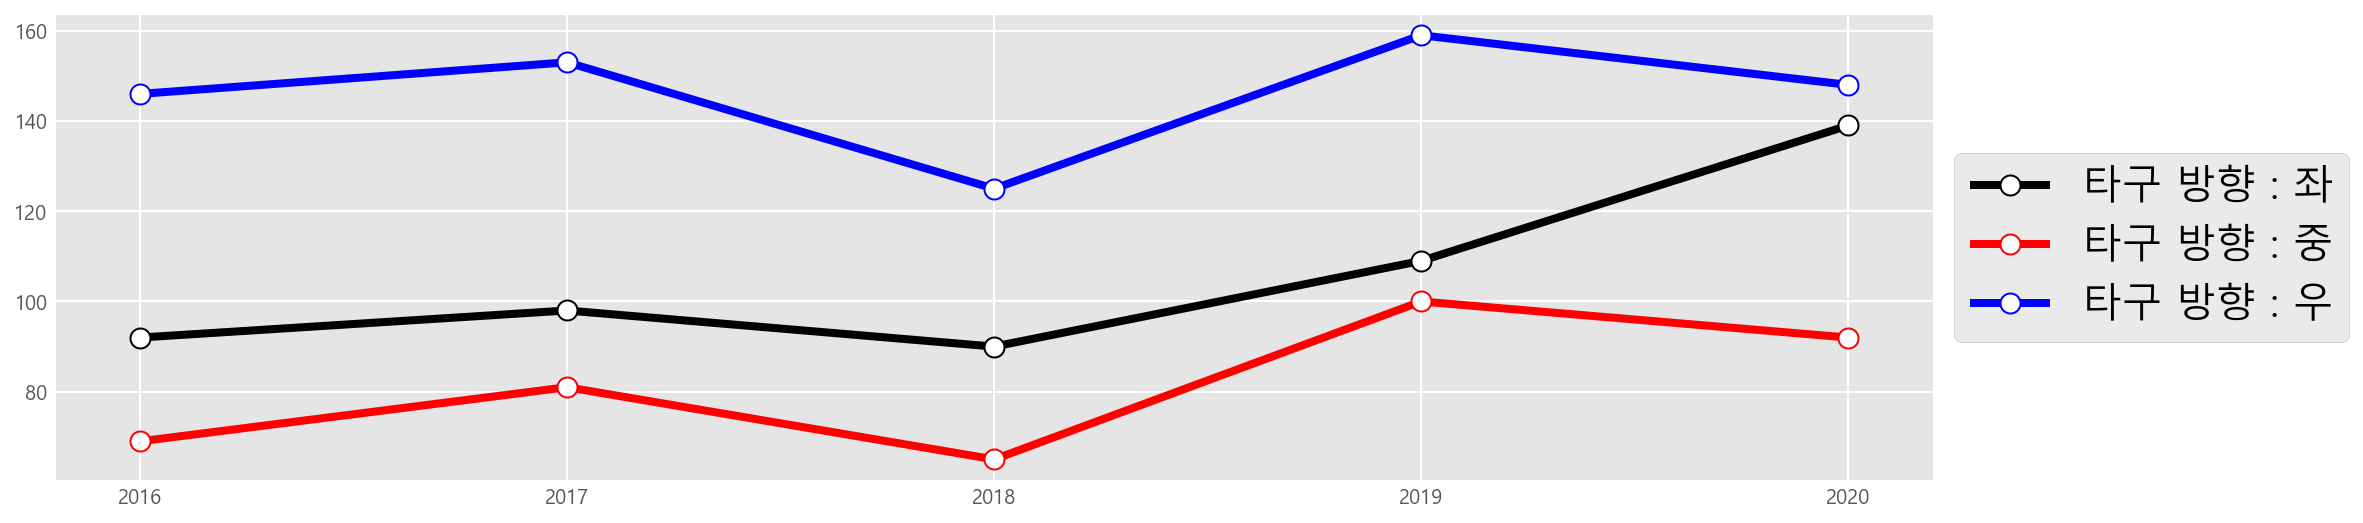

In [26]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot()

plt.plot(tagu_dir_df["연도"],tagu_dir_df["(타구 방향 개수) 좌"],color = 'black',marker = 'o',markerfacecolor='w',markersize=10,label="타구 방향 : 좌")
plt.plot(tagu_dir_df["연도"],tagu_dir_df["중"],color = 'red',marker = 'o',markerfacecolor='w',markersize=10,label="타구 방향 : 중")
plt.plot(tagu_dir_df["연도"],tagu_dir_df["우"],color = 'blue',marker = 'o',markerfacecolor='w',markersize=10,label="타구 방향 : 우")
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5),fontsize = 20)

## 오재일의 삼성에서의 경쟁력

In [27]:
kbo_batter_df = pd.read_csv("kbo_20season_batter_data.csv")
kbo_batter_df

,순,이름,팀,포지션,WAR,출장,타석,타수,득점,안타,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,1,로하스,KT,RF,7.80,142,628,550,116,192,...,0,8,.349,.417,.680,1.097,.467,180.8,7.80,7.29
1,2,김하성,키움,SS,6.87,138,622,533,111,163,...,3,3,.306,.397,.523,.921,.407,147.4,6.87,4.22
2,3,양의지,NC,C,5.95,130,528,461,86,151,...,1,6,.328,.400,.603,1.003,.432,153.3,5.95,3.68
3,4,터커,KIA,RF,5.70,142,631,542,100,166,...,0,4,.306,.398,.557,.955,.420,148.9,5.70,2.40
4,5,최형우,KIA,DH,5.70,140,600,522,93,185,...,0,3,.354,.433,.590,1.023,.450,168.4,5.70,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,369,이성열,한화,DH,-0.93,79,248,227,23,46,...,0,0,.203,.270,.330,.601,.277,57.5,-0.93,-1.13
274,370,김규성,KIA,2B,-1.01,103,182,157,21,28,...,11,0,.178,.246,.261,.507,.226,21.0,-1.01,-1.85
275,371,김태진,NC,3B,-1.03,82,280,263,28,62,...,2,1,.236,.273,.274,.547,.258,41.9,-1.03,-0.57
276,372,박찬호,KIA,SS,-1.15,141,530,479,63,106,...,12,3,.221,.274,.273,.548,.254,39.9,-1.15,-1.96


In [28]:
kbo_1B_batter_df = kbo_batter_df[kbo_batter_df["포지션"] == '1B'].copy()

In [29]:
kbo_1B_batter_df.columns

Index(['순', '이름', '팀', '포지션', 'WAR', '출장', '타석', '타수', '득점', '안타', '2루타',
       '3루타', '홈런', '루타', '타점', '도루', '도루실패', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR*', 'WPA'],
      dtype='object')

In [30]:
pd.set_option("display.max_columns",25)

In [31]:
kbo_1B_batter_df=kbo_1B_batter_df[['이름', '팀', '포지션', 'WAR', '출장', '타석', '타수', '득점', '안타', '2루타','3루타', '홈런', '루타', '타점', '볼넷', '사구', '고4', '삼진', '병살','희타', '희비', '타율', '출루', '장타', 'OPS']]
kbo_1B_top10_batter_df = kbo_1B_batter_df[:10]
kbo_1B_top10_batter_df

,이름,팀,포지션,WAR,출장,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS
11,강백호,KT,1B,4.76,129,574,500,95,165,36,1,23,272,89,66,5,9,93,7,0,3,.330,.411,.544,.955
16,로맥,SK,1B,4.38,139,586,485,85,137,32,0,32,265,91,91,6,5,116,5,0,4,.282,.399,.546,.946
17,라모스,LG,1B,4.37,117,494,431,74,120,17,2,38,255,86,55,4,5,136,7,0,4,.278,.362,.592,.954
23,오재일,두산,1B,3.59,127,534,471,62,147,32,0,16,227,89,61,0,1,92,12,0,2,.312,.390,.482,.872
54,박병호,키움,1B,1.83,93,383,309,56,69,7,0,21,139,66,57,9,2,114,8,0,8,.223,.353,.450,.802
56,강진성,NC,1B,1.75,121,432,395,53,122,25,0,12,183,70,20,9,0,46,11,2,6,.309,.351,.463,.815
63,반즈,한화,1B,1.23,74,319,283,38,75,17,1,9,121,42,27,7,1,81,4,0,2,.265,.342,.428,.769
69,이병규,롯데,1B,0.96,53,194,164,28,45,4,0,9,76,32,28,1,0,55,5,0,1,.274,.381,.463,.845
77,김웅빈,키움,1B,0.77,73,235,207,25,57,13,0,8,94,31,17,3,1,65,6,5,3,.275,.335,.454,.789
94,유민상,KIA,1B,0.47,126,455,390,38,96,23,0,8,143,65,53,6,1,80,13,2,4,.246,.342,.367,.709


In [32]:
kbo_1B_top10_batter_df["장타"] = kbo_1B_top10_batter_df["장타"].astype(float)

<AxesSubplot:xlabel='이름', ylabel='장타'>

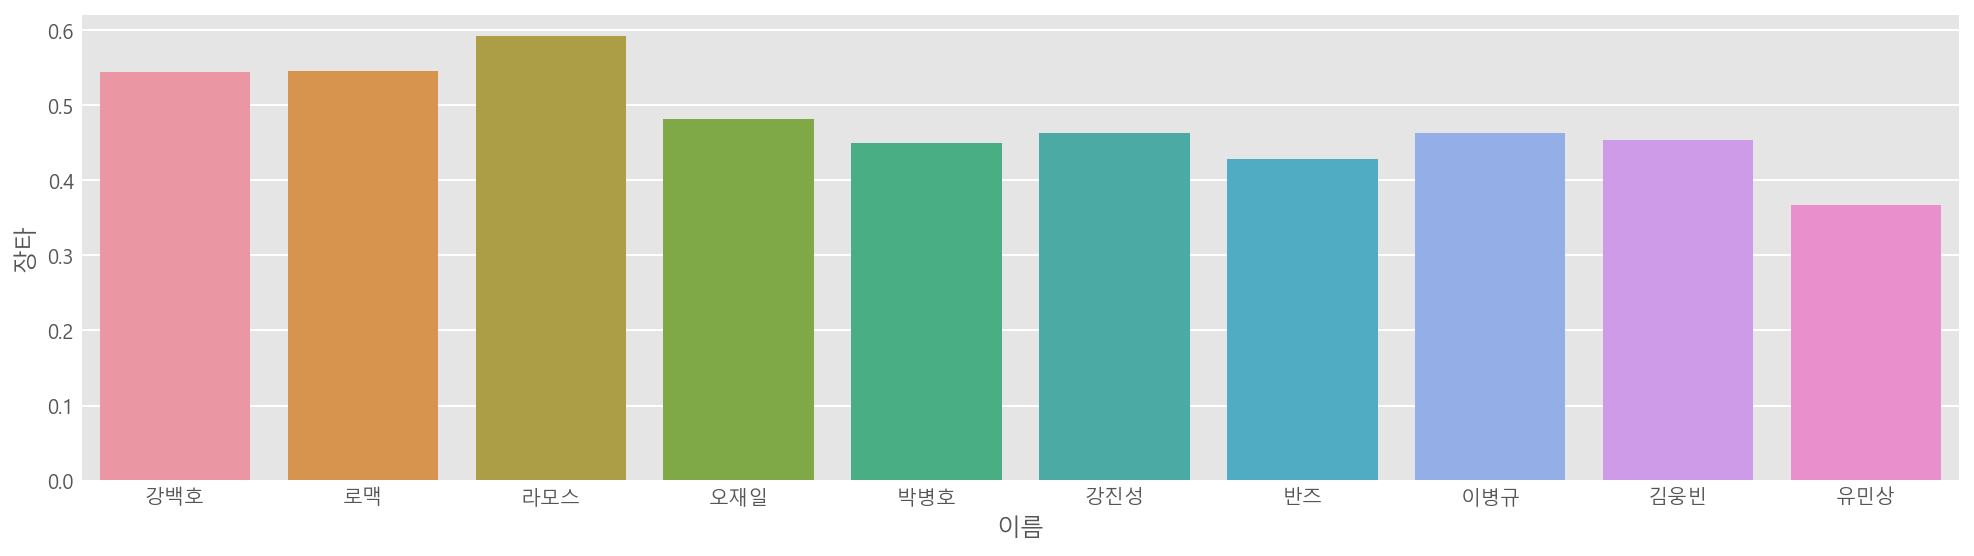

In [33]:
plt.figure(figsize=(15,4))
sns.barplot(data = kbo_1B_top10_batter_df, x="이름", y="장타")

In [35]:
ojl_sl_df = kbo_batter_df[(kbo_batter_df["이름"]=="오재일")|(kbo_batter_df["팀"]=="삼성")]
ojl_sl_df = ojl_sl_df[['이름', '팀', '포지션', 'WAR', '출장', '타석', '타수', '득점', '안타', '2루타','3루타', '홈런', '루타', '타점', '볼넷', '사구', '고4', '삼진', '병살','희타', '희비', '타율', '출루', '장타', 'OPS']]
ojl_sl_df =ojl_sl_df.reset_index(drop=True)
ojl_sl_top10_df = ojl_sl_df[ojl_sl_df["타석"]>200]

In [36]:
ojl_sl_top10_df["타율"] = ojl_sl_top10_df["타율"].astype(float)
ojl_sl_top10_df["출루"] = ojl_sl_top10_df["출루"].astype(float)
ojl_sl_top10_df["장타"] = ojl_sl_top10_df["장타"].astype(float)

In [37]:
ojl_sl_top10_df

,이름,팀,포지션,WAR,출장,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS
0,오재일,두산,1B,3.59,127,534,471,62,147,32,0,16,227,89,61,0,1,92,12,0,2,0.312,0.390,0.482,.872
1,구자욱,삼성,LF,3.35,118,510,446,70,137,27,2,15,213,78,51,8,3,91,4,1,4,0.307,0.385,0.478,.863
2,김상수,삼성,2B,3.25,120,471,404,71,123,18,3,5,162,47,55,8,1,55,16,2,2,0.304,0.397,0.401,.798
3,강민호,삼성,C,3.00,119,393,355,46,102,14,0,19,173,61,31,4,2,54,17,0,3,0.287,0.349,0.487,.836
4,박해민,삼성,CF,2.48,132,541,489,84,142,18,5,11,203,55,39,3,1,77,7,7,3,0.290,0.345,0.415,.760
5,김동엽,삼성,DH,2.21,115,451,413,60,129,21,0,20,210,74,29,4,0,79,14,1,4,0.312,0.360,0.508,.869
7,이원석,삼성,3B,1.27,121,467,403,46,108,17,0,13,164,74,49,2,1,82,7,1,12,0.268,0.341,0.407,.748
11,이학주,삼성,SS,0.35,64,243,206,30,47,11,0,4,70,28,26,2,1,58,3,4,5,0.228,0.314,0.340,.654
13,김지찬,삼성,2B,0.12,135,287,254,47,59,5,1,1,69,13,24,2,0,44,1,5,2,0.232,0.301,0.272,.573
25,김헌곤,삼성,RF,-0.31,97,283,254,26,63,8,0,3,80,34,22,3,0,31,7,1,3,0.248,0.312,0.315,.627


[Text(0, 0.5, '')]

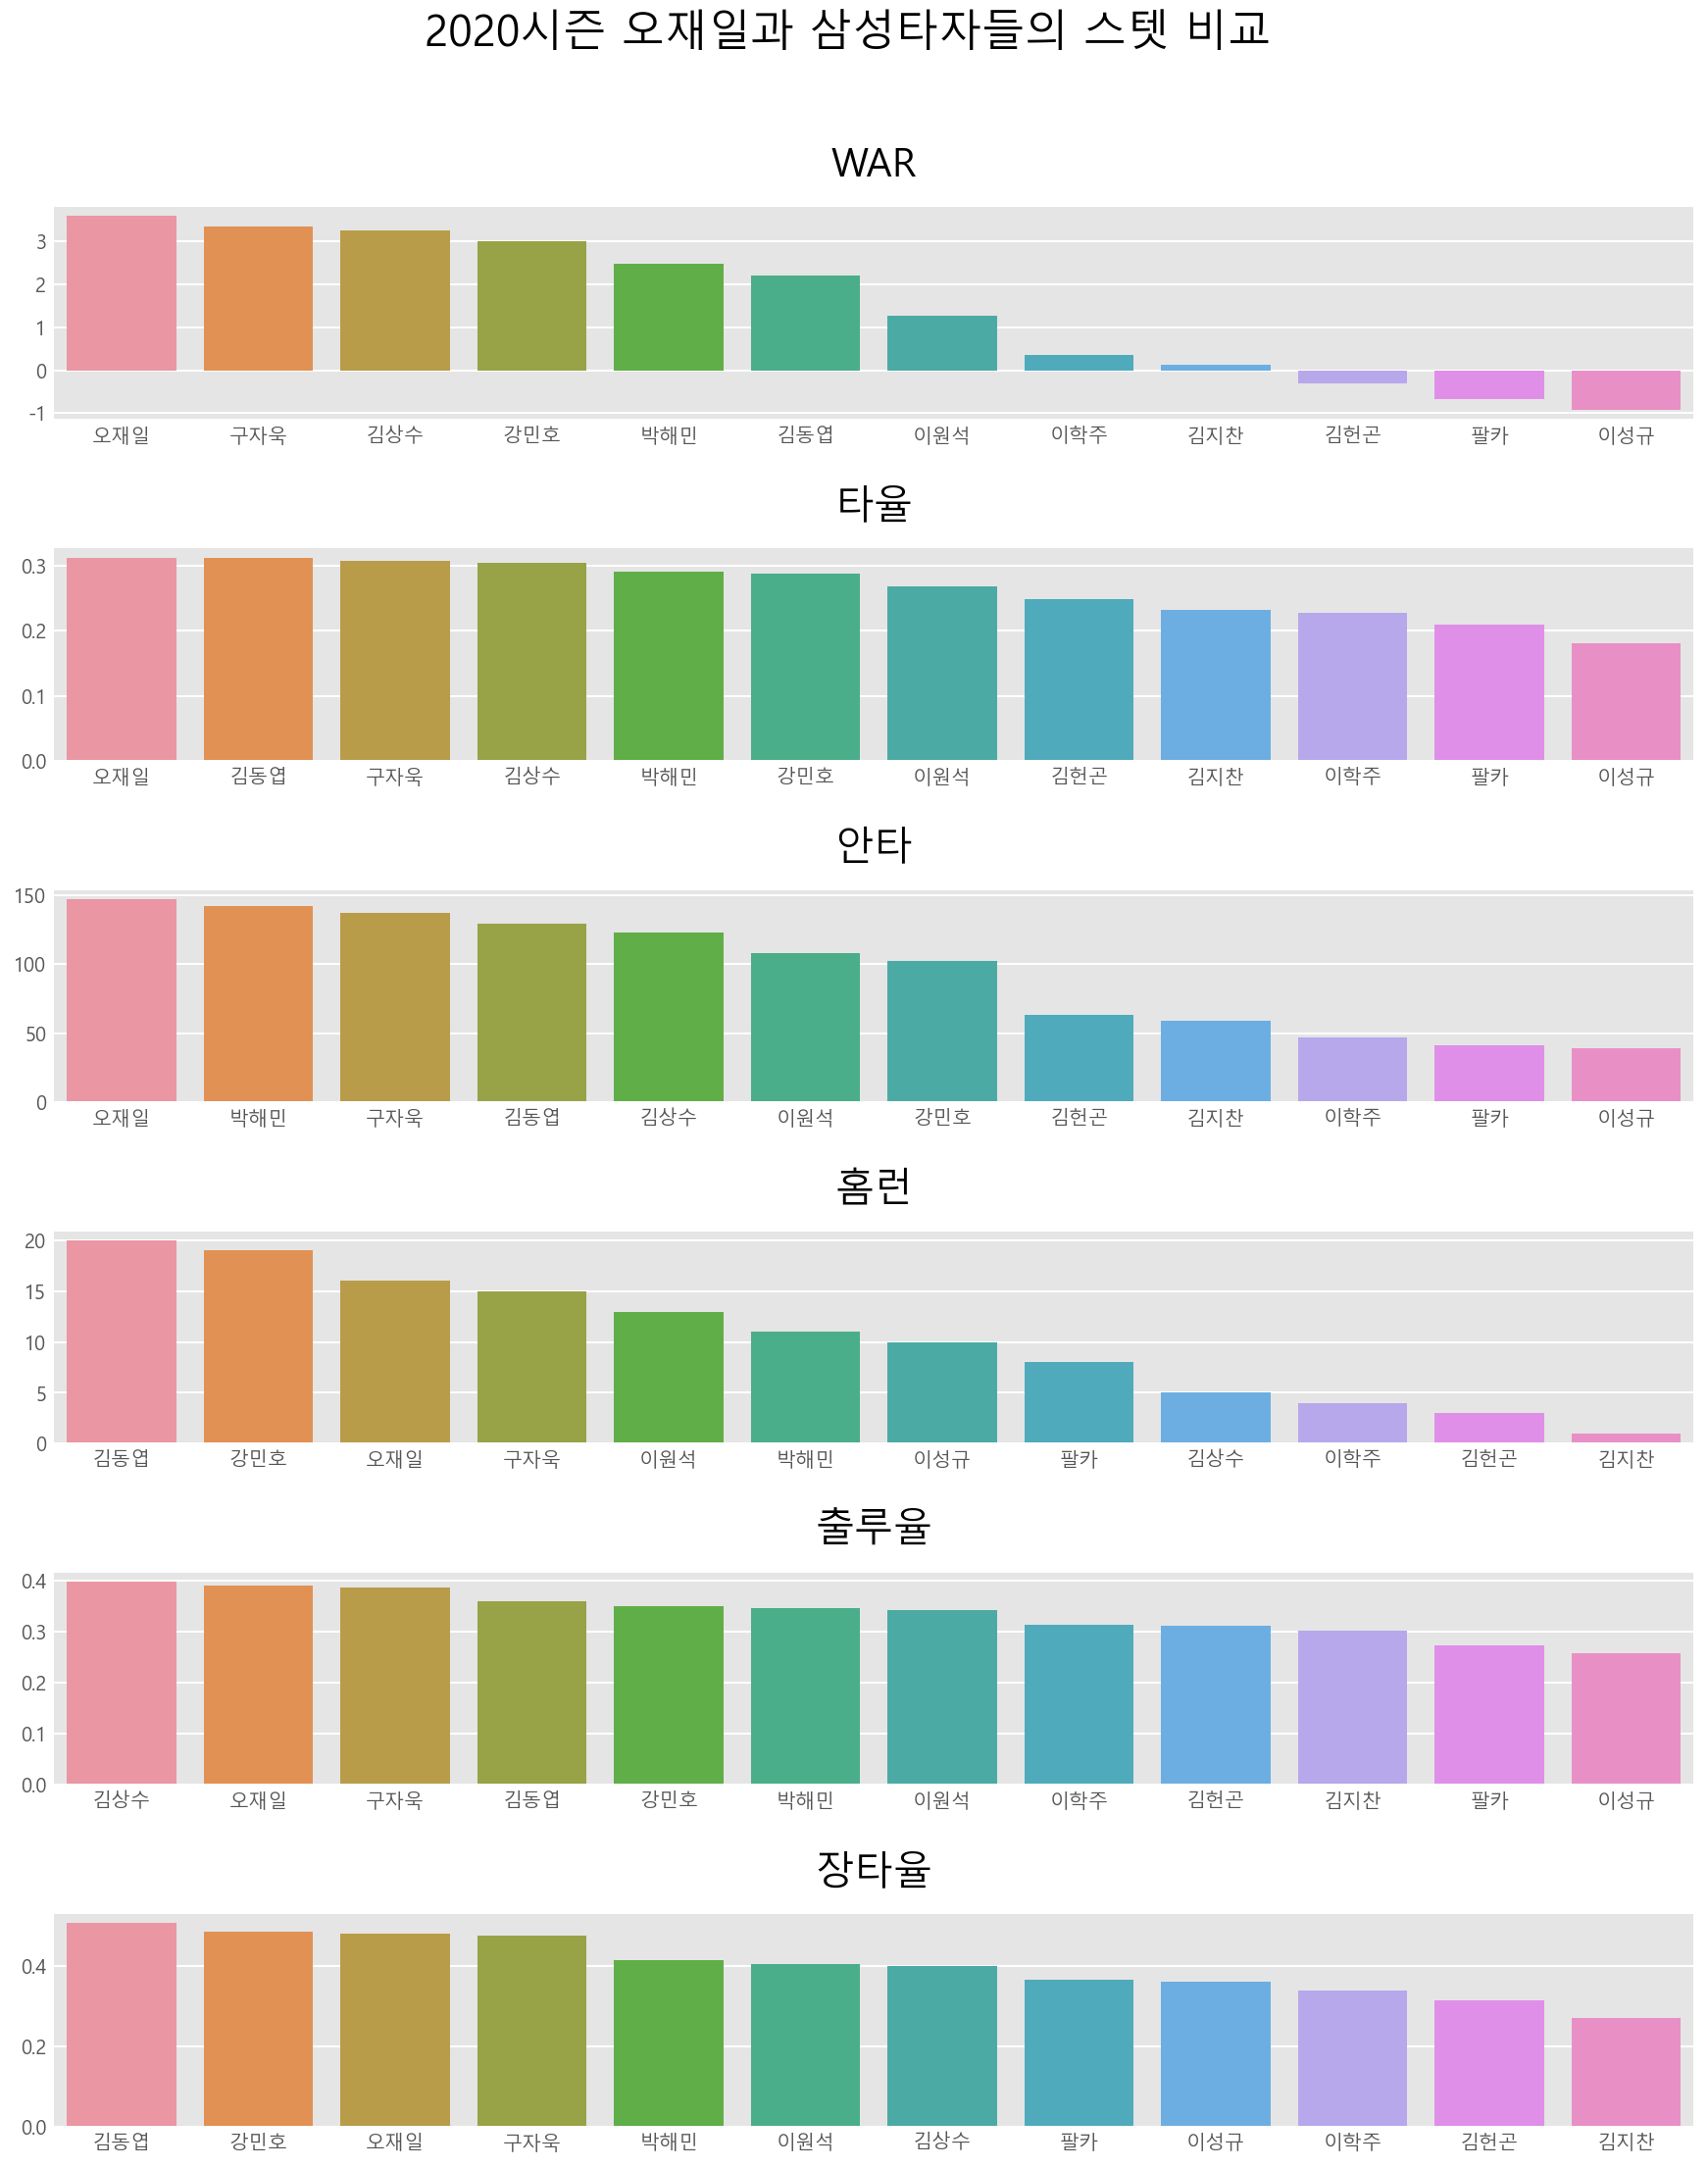

In [40]:
fig, axes = plt.subplots(6,1,figsize=(15,17))
fig.suptitle('2020시즌 오재일과 삼성타자들의 스텟 비교',fontsize=22)
ojl_sl_top10_df = ojl_sl_top10_df.sort_values(by="WAR",ascending=False)
axes[0].set_title('WAR',pad=15,size=20)
g1 = sns.barplot(ax=axes[0],x=ojl_sl_top10_df["이름"], y = ojl_sl_top10_df["WAR"])
g1.set(xlabel=None)
g1.set(ylabel=None)

ojl_sl_top10_df = ojl_sl_top10_df.sort_values(by="타율",ascending=False)
axes[1].set_title('타율',pad=15,size=20)
g2 = sns.barplot(ax=axes[1],x=ojl_sl_top10_df["이름"], y = ojl_sl_top10_df["타율"])
g2.set(xlabel=None)
g2.set(ylabel=None)

ojl_sl_top10_df = ojl_sl_top10_df.sort_values(by="안타",ascending=False)
axes[2].set_title('안타',pad=15,size=20)
g3 = sns.barplot(ax=axes[2],x=ojl_sl_top10_df["이름"], y = ojl_sl_top10_df["안타"])
g3.set(xlabel=None)
g3.set(ylabel=None)

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.6)

ojl_sl_top10_df = ojl_sl_top10_df.sort_values(by="홈런",ascending=False)
axes[3].set_title('홈런',pad=15,size=20)
g4 = sns.barplot(ax=axes[3],x=ojl_sl_top10_df["이름"], y = ojl_sl_top10_df["홈런"])
g4.set(xlabel=None)
g4.set(ylabel=None)

ojl_sl_top10_df = ojl_sl_top10_df.sort_values(by="출루",ascending=False)
axes[4].set_title('출루율',pad=15,size=20)
g5 = sns.barplot(ax=axes[4],x=ojl_sl_top10_df["이름"], y = ojl_sl_top10_df["출루"])
g5.set(xlabel=None)
g5.set(ylabel=None)

ojl_sl_top10_df = ojl_sl_top10_df.sort_values(by="장타",ascending=False)
axes[5].set_title('장타율',pad=15,size=20)
g6 = sns.barplot(ax=axes[5],x=ojl_sl_top10_df["이름"], y = ojl_sl_top10_df["장타"])
g6.set(xlabel=None)
g6.set(ylabel=None)
